In [4]:
from datascience import *
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import itertools
import seaborn as sn
from textblob import TextBlob
import twint
%matplotlib inline

In [3]:
march_pt_3 = pd.read_csv('data/patterns-part3.csv')

In [12]:
march_pt_3.columns

Index(['safegraph_place_id', 'location_name', 'street_address', 'city',
       'region', 'postal_code', 'safegraph_brand_ids', 'brands',
       'date_range_start', 'date_range_end', 'raw_visit_counts',
       'raw_visitor_counts', 'visits_by_day', 'poi_cbg', 'visitor_home_cbgs',
       'visitor_daytime_cbgs', 'visitor_work_cbgs',
       'visitor_country_of_origin', 'distance_from_home', 'median_dwell',
       'bucketed_dwell_times', 'related_same_day_brand',
       'related_same_month_brand', 'popularity_by_hour', 'popularity_by_day',
       'device_type'],
      dtype='object')

In [25]:
subset = march_pt_3.loc[:, ['location_name','city', 'region', 'raw_visitor_counts', 'date_range_start', 'date_range_end']]
subset.head()

,location_name,city,region,raw_visitor_counts,date_range_start,date_range_end
0,Chevron Extra Mile,Gardena,CA,60,2020-03-01T00:00:00-08:00,2020-04-01T00:00:00-07:00
1,Country Cleaning Services,Smithville,TX,3,2020-03-01T00:00:00-06:00,2020-04-01T00:00:00-05:00
2,Walgreens,Ripon,WI,237,2020-03-01T00:00:00-06:00,2020-04-01T00:00:00-05:00
3,Pastosa Ravioli,Brooklyn,NY,179,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00
4,Devon Lincoln Plaza,Chicago,IL,508,2020-03-01T00:00:00-06:00,2020-04-01T00:00:00-05:00


In [26]:
florida = subset.loc[subset['region'] == 'FL']
florida.head()

,location_name,city,region,raw_visitor_counts,date_range_start,date_range_end
7,Village Square,Coral Springs,FL,203,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00
42,Rene's Specializing In Mercedes,Apopka,FL,15,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00
46,Nemours Children's Urgent Care Kissimmee,Kissimmee,FL,52,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00
64,Pinellas Affordable Pressure Washing,Saint Petersburg,FL,5,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00
67,Papi's Tire Service,Bradenton,FL,148,2020-03-01T00:00:00-05:00,2020-04-01T00:00:00-04:00


In [20]:
import ast
x = subset.iloc[0, 3]
len(ast.literal_eval(x))

31

## Reddit Mental Health Dataset EDA (outdated)

In [7]:
mh_post = pd.read_csv('data/mentalhealth_post_features_tfidf_256.csv')
mh_pre = pd.read_csv('data/mentalhealth_pre_features_tfidf_256.csv')

In [77]:
anxiety_post = pd.read_csv('data/anxiety_post_features_tfidf_256.csv')
anxiety_pre = pd.read_csv('data/anxiety_pre_features_tfidf_256.csv')

In [10]:
len(mh_pre)

18925

In [78]:
mh_post.head(3)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,mentalhealth,Autumfire117,2020/01/01,"Not depressed or suicidal, yet the thought of ...",6.283511,5.687673,6.568202,80.795116,66.002584,9.955408,...,0.0,0.139581,0.000000,0.000000,0.0,0.0,0.051431,0.000000,0.0,0.093246
1,mentalhealth,elf_boy_,2020/01/01,How I Barely Survived the Last Decade Trigger ...,4.953877,6.139650,5.820522,78.808202,69.141398,9.052063,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.020834,0.096198,0.0,0.245525
2,mentalhealth,mcks02,2020/01/01,Coping skills I was wondering if anyone had an...,0.919777,2.657734,3.307321,90.400864,80.951220,6.229480,...,0.0,0.000000,0.137643,0.092402,0.0,0.0,0.000000,0.000000,0.0,0.081734


In [75]:
def compare_top_TFIDFs(pre_df, post_df):
    
    # Get TF_IDF columns and mean for each column
    tf_idf_pre_from_df = mh_pre.iloc[:, 94:]
    avg_score_pre = tf_idf_pre_from_df.apply(np.mean, axis=0)

    tf_idf_post_from_df = mh_post.iloc[:, 94:]
    avg_score_post = tf_idf_post_from_df.apply(np.mean, axis=0)

    avg_scores = pd.DataFrame()
    avg_scores['pre'] = avg_score_pre
    avg_scores['post'] = avg_score_post
    
    top_ten_scores_by_post = avg_scores.sort_values(by='post', ascending=False).iloc[:10, :]
    top_ten_scores_by_post.plot.bar(figsize=(15, 8), rot=0)
    plt.show()

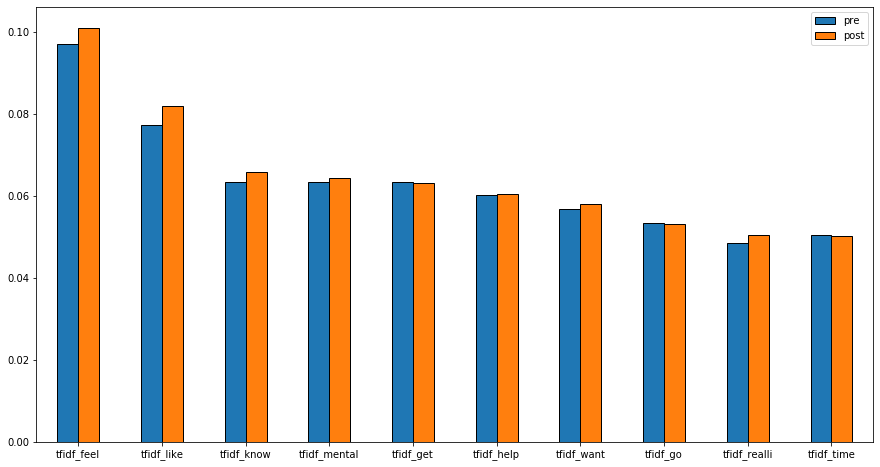

In [76]:
compare_top_TFIDFs(mh_pre, mh_post)

Polarity

In [31]:
mh_post['liwc_family'][:10]

0    1
1    5
2    4
3    0
4    0
5    0
6    0
7    5
8    4
9    3
Name: liwc_family, dtype: int64

## Notes

`automated_readability_index`: gives an estimate of the U.S. grade level that can understand the text. Example: ARI of 9-10 means that the text can be understood by a 4th grader or older.

In [17]:
# Get post data
def get_tfidf_matrix(df, colname):
    text_list = df[colname]
    tf = TfidfVectorizer(analyzer='word', 
                     ngram_range=(1,3), 
                     min_df = 0, 
                     stop_words = 'english')
    
    tfidf_matrix = tf.fit_transform(text_list)
    return (tf, tfidf_matrix)

In [18]:
tf_pre, tfidf_matrix_pre = get_tfidf_matrix(mh_pre, 'post')

In [19]:
tf_pre.get_feature_names()[:5]

['00', '00 00', '00 00 morning', '00 09', '00 09 00']

In [25]:
tfidf_matrix_pre_dense = tfidf_matrix_pre.todense()
tfidf_matrix_pre_dense.shape

(18925, 2378728)

In [15]:
tf_pre = TfidfVectorizer(analyzer='word', 
                     ngram_range=(1,3), 
                     min_df = 0, 
                     stop_words = 'english')
tf_post = TfidfVectorizer(analyzer='word', 
                     ngram_range=(1,3), 
                     min_df = 0, 
                     stop_words = 'english')

In [ ]:
tfidf_matrix_pre = tf_pre.fit_transform(posts_pre)